In [2]:
import numpy as np, matplotlib.pyplot as plt, seawater as sw, mPWP as PWP

In [1]:
import importlib;
importlib.reload(PWP);

NameError: name 'PWP' is not defined

In [3]:
# set up initial parameters (these are also set as defaults in the PWP code, so don't need to put them in)

T0 = 0; # reference temperature (degC)
S0 = 34; # reference salinity (parts per thousand; ppt)
rho0 = 1025; # reference density (kg m^-3)
alpha = -sw.alpha(S0,T0,0)*rho0 # thermal expansion   coefficient (kg m^-3 degC^-1)
beta = sw.beta(S0,T0,0)*rho0 # haline contraction coefficient (kg m^-3 ppt^-1 )
latitude = -75; # degrees north
f = sw.f(latitude) # planetary vorticity


In [4]:
def get_insolation(t,amp=400,mean=0,phase=np.pi/4):
    return amp*np.sin(t/(86400*365)*2*np.pi+phase) + mean

def get_fwflux(t,amp=0.0005,mean=-0.0003,phase=np.pi/4):
    return amp*np.sin(t/(86400*365)*2*np.pi+phase) + mean

In [9]:
import time
# set up time
dt = 900; # seconds
days = 10
t = np.arange(0,86400*days,dt)

# create initial profile
dz = .5
z = np.arange(dz/2,800,dz)

shape = (len(t[0::200]),len(z[0::2]));
mld_shape = (len(t[0::200]));

Ts_full=np.empty(shape=shape)
Ss_full=np.empty(shape=shape)
Us_full=np.empty(shape=shape)
Vs_full=np.empty(shape=shape)
mld_full=np.empty(shape=mld_shape)

shape = (len(t),len(z))
Ts = np.empty(shape=shape)
Ss = np.empty(shape=shape)
Us = np.empty(shape=shape)
Vs = np.empty(shape=shape)
mld = np.empty(shape=t.shape)
Us[0] = np.zeros(len(z))
Vs[0] = np.ones(len(z))
mld[0] = 0;

#Shelf profile
T_shelf = T0+4*(z/1000);
S_shelf = S0+1.5*(z/1000);

Ts[0] = T0+4*(z/1000);

Ss[0] = S0+1.5*(z/1000);

phi = 0.002;
    # run model

start = time.time();
for i in range(len(t)-1):
        if np.remainder(t[i]/86400,2)==0:
            end = time.time()
            print('Day: ',t[i]/86400,' run time: ',np.around(end-start))
        I = get_insolation(t[i]); # solar heating
        L = 0; # OLR
        E = 0; # evaporation
        P = get_fwflux(t[i]); #get_precipitation(t[i]); # precipitation
        tau_x = 0; # zonal wind stress
        tau_y = 0; # meridional wind stress

        Ts[i+1],Ss[i+1],Us[i+1],Vs[i+1],mld[i+1] = PWP.model_timestep(Ts[i],Ss[i],Us[i],Vs[i],z,I,L,E,P,tau_x,tau_y,dt,return_MLD=True,T0=T0,S0=S0,rho0=rho0,alpha=alpha,beta=beta,f=f,advection=True,phi=phi,use_shear_stability=True,verbose=False,vert_diffusivity=1e-5,shelf_thick=350)

end = time.time()
print('Final Time: ',np.around(end-start))



Day:  0.0  run time:  0.0
Day:  2.0  run time:  0.0
Day:  4.0  run time:  1.0
Day:  6.0  run time:  1.0
Day:  8.0  run time:  1.0
Final Time:  1.0


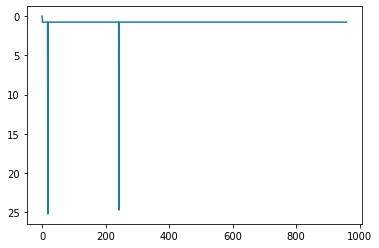

In [10]:
plt.plot(mld)
plt.gca().invert_yaxis();

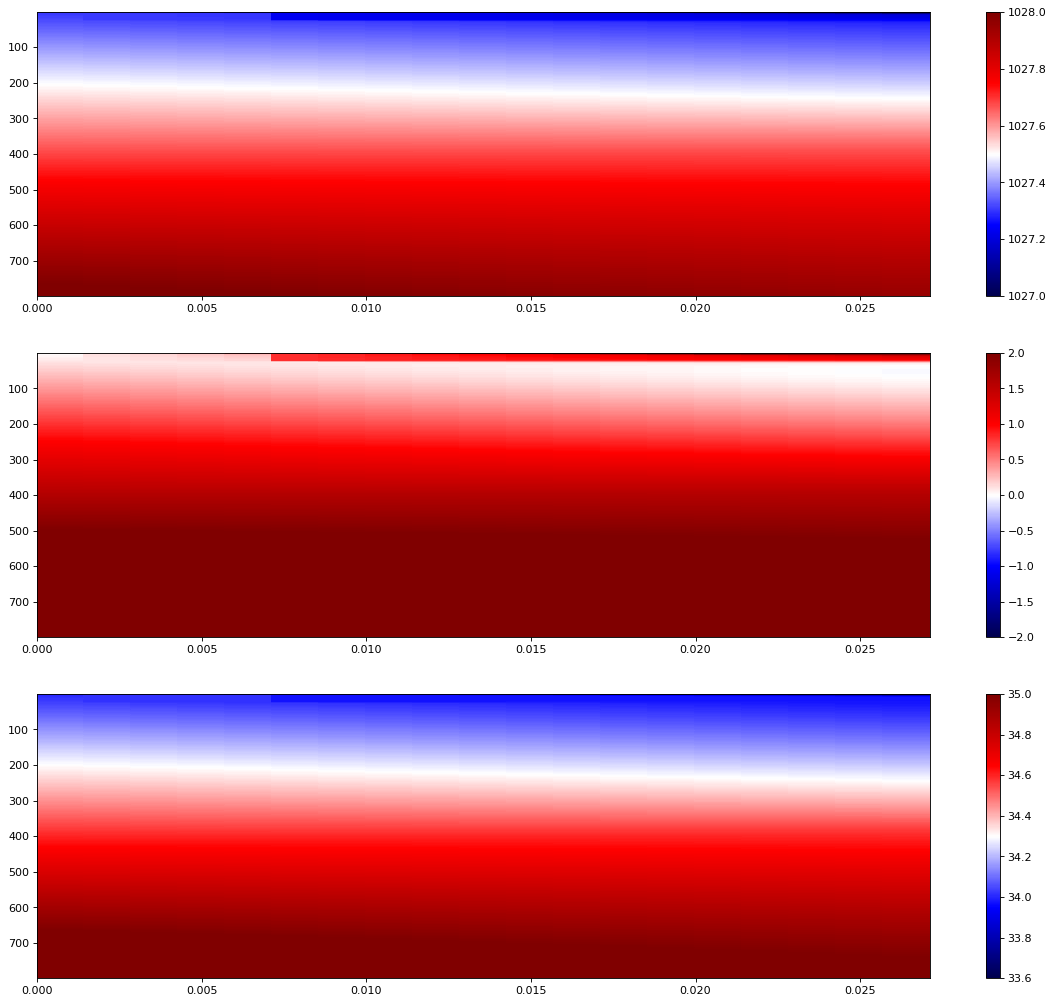

In [11]:
Ds = sw.pden(Ss[0::50,0::2],Ts[0::50,0::2],0)

dt = 900; # seconds
days = 10;
t = np.arange(0,86400*days,dt)

dz = .5
z = np.arange(dz/2,800,dz)

plt.close('all')
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
m = plt.pcolor(t[0::50]/86400/365,z[0::2],np.matrix.transpose(Ds),cmap='seismic',vmin = 1027., vmax = 1028.);
#levels = np.linspace(-2, 2, 10)
#plt.imshow(Ts,aspect = 0.001)
plt.colorbar(m);
#plt.ylim(0,200);
plt.gca().invert_yaxis();
#plt.xlim(0,t[i]/86400);
#plt.plot(t[0::200]/86400,h_interface[0::200]/2)
#plt.xlim(0,4.5)
#m.get_clim()

plt.subplot(3,1,2)
m = plt.pcolor(t[0::50]/86400/365,z[0::2],np.matrix.transpose(Ts[0::50,0::2]),cmap='seismic',vmin = -2., vmax = 2.);
#levels = np.linspace(-2, 2, 10)
#plt.imshow(Ts,aspect = 0.001)
plt.colorbar(m);
#plt.ylim(0,200);
plt.gca().invert_yaxis();
#plt.xlim(0,t[i]/86400);
#plt.plot(t[0::200]/86400,h_interface[0::200]/2)
#plt.xlim(0,4.5)
#m.get_clim()

plt.subplot(3,1,3)
m = plt.pcolor(t[0::50]/86400/365,z[0::2],np.matrix.transpose(Ss[0::50,0::2]),cmap='seismic',vmin = 33.6, vmax = 35.);
#levels = np.linspace(-2, 2, 10)
#plt.imshow(Ts,aspect = 0.001)
plt.colorbar(m);
#plt.ylim(0,200);
plt.gca().invert_yaxis();
#plt.xlim(0,t[i]/86400);
#plt.plot(t[0::200]/86400,h_interface[0::200]/2)
#plt.xlim(0,4.5)
#m.get_clim()
